### *** Names: Jakia, Ryogo ***

# Lab 3: The global star formation law

## Day 1: Plotting the observed star formation law

In [1]:
# As usual, import some useful packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.units as u
from astropy.io import ascii

In [2]:
# And mount the Google Drive so we can access files
from google.colab import drive
drive.mount('/content/drive')
import sys

# TODO: modify this path to match wherever you've saved all the lab datafiles
sys.path.append('/content/drive/My Drive')

Mounted at /content/drive


Let's work with real measurements of the star formation law! We will use data from de los Reyes & Kennicutt (2019): https://arxiv.org/abs/1901.01283

In [3]:
# Just run this cell - make sure you look at the code to understand what it's doing, but you don't need to edit it!

# First, read in galaxy information from table 1
galaxyinfo = ascii.read('/content/drive/MyDrive/Academic/2025S/ASTR 352/Lab03/sflawgalaxies.txt')

# Then filter out which galaxies are spirals
spirals = np.where(galaxyinfo['MType']=='s')

# Read in the star formation law data from table 4
data = ascii.read('/content/drive/MyDrive/Academic/2025S/ASTR 352/Lab03/sflawdata.txt')

# We only care about the spiral galaxies, so let's filter those out
spiraldata = data[spirals]

# Let's also clean up the data a little by getting rid of upper limits
spiraldata = spiraldata[np.where((data[spirals]['n_logSFRcorr']==0) & (data[spirals]['n_logSigH2']==0))]

Okay, let's compute the quantities we care about for the star formation law. On both axes, we need surface densities in logarithmic form $(\log\Sigma)$.

*All logs in this lab are log base-10, NOT natural logs!*

### Exercise 1

On the x-axis, we want $\log\Sigma$ of *total* gas, which is the sum of both molecular (H2) and atomic (HI) gas. In other words, you want $\log(\Sigma_{HI}+\Sigma_{H_{2}})$, but the table only lists $\log(\Sigma_{HI})$ (in column `spiraldata['logSigHI']`) and $\log(\Sigma_{H_{2}})$ (in column `spiraldata['logSigH2']`).

In the following cell, compute $\log(\Sigma)$ of total gas.

Once you've finished, **check with Prof Mia to make sure your calculation looks good!**

In [4]:
# TODO: Compute log(surface density of total gas)
logSigGas = np.log10(10**(spiraldata['logSigHI'])+10**(spiraldata['logSigH2']))

Now let's compute $\log\Sigma$ of SFR. Fortunately, this is already in the `spiraldata` column, but which column is it? *Hint*: try looking at the column descriptions in the `sflawdata.txt` file.

In [5]:
spiraldata.columns

<TableColumns names=('Seq','Name','n_logSFRuncorr','logSFRuncorr','e_logSFRuncorr','n_logSFRcorr','logSFRcorr','e_logSFRcorr','logSigSFRcorr','logSigHI','r_logSigHI','n_logSigH2','logSigH2','r_logSigH2')>

In [6]:
# TODO: Get log(surface density of SFR)
logSigSFR = spiraldata['logSigSFRcorr']

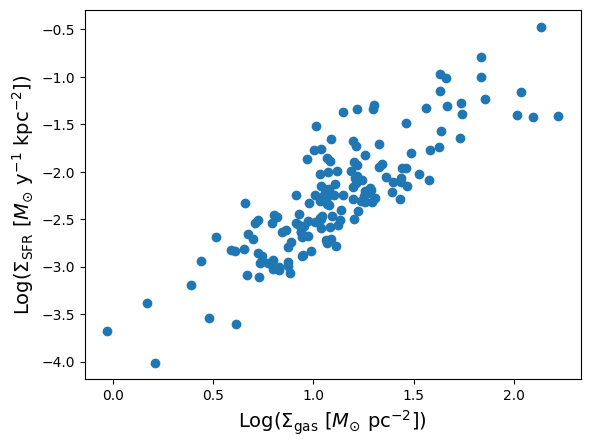

In [7]:
# TODO: Complete the code below to make a plot of the star formation law!
# (Make sure your plot doesn't have any lines connecting the points)
plt.scatter(logSigGas, logSigSFR)
plt.xlabel('Log$(\Sigma_{\mathrm{gas}}~[M_{\odot}~\mathrm{pc}^{-2}])$', fontsize=14)
plt.ylabel('Log$(\Sigma_{\mathrm{SFR}}~[M_{\odot}~\mathrm{y}^{-1}~\mathrm{kpc}^{-2}])$', fontsize=14)
plt.show()

### Exercise 2

Cool! Let's add a line of best fit to the observed data. (*Hint*: Look up the `np.polyfit()` function)

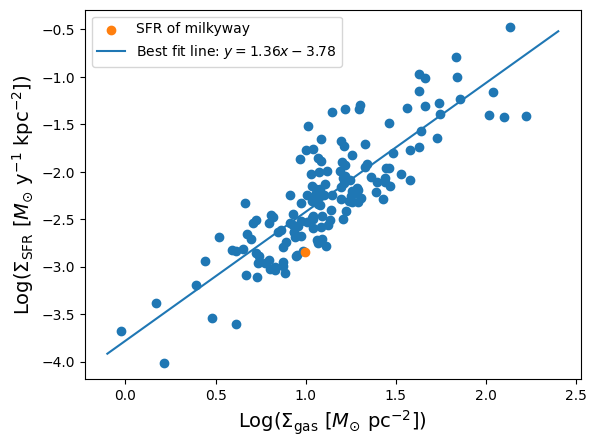

In [12]:
# TODO: Copy the code from the previous cell (without the plt.show() command) in order to re-plot the observed data
plt.scatter(logSigGas, logSigSFR)
area = np.pi*15000**2
plt.scatter(np.log10(7*10**9/area),np.log10(1/(area/10**6)), label = 'SFR of milkyway')
plt.xlabel('Log$(\Sigma_{\mathrm{gas}}~[M_{\odot}~\mathrm{pc}^{-2}])$', fontsize=14)
plt.ylabel('Log$(\Sigma_{\mathrm{SFR}}~[M_{\odot}~\mathrm{y}^{-1}~\mathrm{kpc}^{-2}])$', fontsize=14)
# TODO: Use the np.polyfit() function to do a simple least-squares fit to the line
bestfit = np.polyfit(logSigGas, logSigSFR,1)

# Evaluate the best-fit model at a bunch of points
x = np.arange(-0.1,2.5,0.1)  # These are the x-values that we'll use to plot the best-fit model
yfit = np.polyval(bestfit,x)

# Plot the best-fit model
plt.plot(x, yfit, ls='-', label='Best fit line: $y={:.2f}x-{:.2f}$'.format(bestfit[0], np.abs(bestfit[1])))

plt.legend()
plt.show()

### Questions

1. Consult with the groups next to you. Does your plot (and your linear fit) exactly match theirs? Why or why not? \
**yes, we used the same data**

2. Does your plot (and linear fit) exactly match Figure 3 of the paper (de los Reyes & Kennicutt 2019, https://arxiv.org/abs/1901.01283)? Why or why not? \
**the slope in the paper is 1.41+-0.07 and our slope (1.36) falls into the uncertainty range. The y-intercept is also close (ours is -3.78 which falls into the paper's uncertainty range -3.84+0.08).**

2. We did a pretty simple linear fit. How could we improve it? \
**We can take a residual plot to see if the data points are distributed randomly or there is a trend. We can also do a least square fit.**

**BONUS QUESTION:**

4. The Milky Way has a star formation rate of $\sim1~M_{\odot}/\mathrm{y}$, a gas mass of $\sim7\times10^{9}~M_{\odot}$, and a radius of $\sim15~\mathrm{kpc}$. Add a star marking the location of the Milky Way on the above plot.

## Day 2: Star formation, gravity, and turbulence

### Exercise 1

In class, we showed that if star formation is totally driven by gravitational collapse, we get the following relation: $\Sigma_{\mathrm{SFR}}=A\Sigma_{\mathrm{gas}}^{1.5}$, where $A$ is some proportionality constant.

Let's add this model to our plot of observed data!

Recall that in order to plot this equation on log scale, you need to take the (base-10) log of both sides.

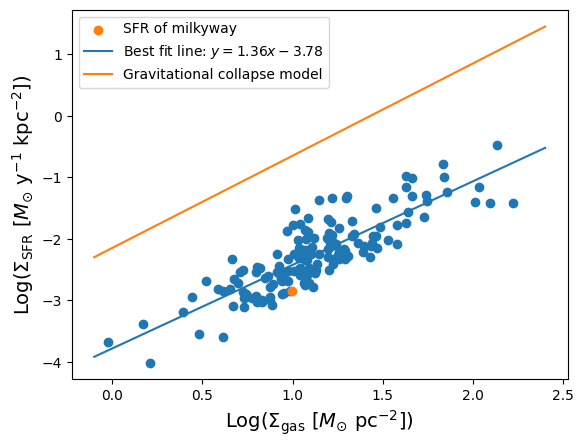

In [14]:
# TODO: Copy the code from the previous cell (without the plt.legend() and plt.show() commands)

plt.scatter(logSigGas, logSigSFR)
area = np.pi*15000**2
plt.scatter(np.log10(7*10**9/area),np.log10(1/(area/10**6)), label = 'SFR of milkyway')
plt.xlabel('Log$(\Sigma_{\mathrm{gas}}~[M_{\odot}~\mathrm{pc}^{-2}])$', fontsize=14)
plt.ylabel('Log$(\Sigma_{\mathrm{SFR}}~[M_{\odot}~\mathrm{y}^{-1}~\mathrm{kpc}^{-2}])$', fontsize=14)
bestfit = np.polyfit(logSigGas, logSigSFR,1)

# Evaluate the best-fit model at a bunch of points
x = np.arange(-0.1,2.5,0.1)  # These are the x-values that we'll use to plot the best-fit model
yfit = np.polyval(bestfit,x)

# Plot the best-fit model
plt.plot(x, yfit, ls='-', label='Best fit line: $y={:.2f}x-{:.2f}$'.format(bestfit[0], np.abs(bestfit[1])))

# TODO: Then add some code to plot a line showing the pure gravitational collapse star formation model

# Hint: your equation should involve the variables `x` and `logA` (the proportionality constant)
logA = np.log10(7.13e-3)  # This is the log10(proportionality constant)
ymodel = 1.5*x+logA # <- Put the gravitational collapse model equation (in log form!) here
plt.plot(x, ymodel, ls='-', label='Gravitational collapse model')

plt.legend()
plt.show()

### Questions

1. How well does the gravitational collapse model compare to the actual data? \
**the y-intercept is differed fromthe actual data by ~$10^2$**
2. Physically, what does this suggest? Is observed star formation more or less efficient than we expect if star formation is driven by pure gravitational collapse? \
**The actual SFR model has 1% efficiency of the theoretical model.**
3. Based on our discussion in class, what physical processes might contribute to this inefficiency? \
**Turbulence and magnetic field in addition to the thermal energy.**


**BONUS QUESTIONS:**

4. How can you *quantitatively* modify the equation for the gravitational collapse model to get it to better match the data? Your answer to this should involve a number!\
**multiply the interecept by 0.01 (before taking the log) or add -2 to log(intercept).**

5. Look at this paper (Orr et al. 2018), which studied galaxy simulations: https://arxiv.org/abs/1701.01788. What's the global efficiency of star formation that they measure? (*Hint*: Use ctrl+F to search for useful keywords.) How does this compare to your answer to #4? \
**from the paper: "We find kpcaveraged star formation efficiencies of $ϵ ≈ 0.01-0.1$ consistently for our entire range of star formation rate surface
density." which matches our answer where we've taken the correction factor to be 0.01.**

## Submitting Pre-labs and Labs for Grading

Before submitting any notebook for grading, please follow the following steps:

1) Make sure the names of all group members are in a markdown cell at the top of the file.

2) Save the notebook as a PDF. Depending on what program you use, you may need to use some variation of the following command: "File -> Print -> Save to PDF"

3) Upload the PDF to Gradescope. **Make sure all group members' names are on the Gradescope submission, and that all code outputs (and anything you changed in the code, including comments) are visible.**